- Pour la SST, je n'ai jamais vraiment testé à cause de l'hétérogéneité de la résolution effective au sein de la donnée mais peut être essayer 1.5j-15km 

In [27]:
import numpy as np                                                                                                                                                                                  
import xarray as xr                                                                                                                                                                                 
import os                                                                                                                                                                                           
import matplotlib.pyplot as plt                                                                                                                                                                     
import matplotlib.cm as cm    
import matplotlib.pyplot as plt
import numpy as np                                                                                                                                                                                  
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.reset_defaults()
sns.set_context("talk", font_scale=0.8)
import warnings
warnings.filterwarnings('ignore')
from myfuncts2  import *
%load_ext autoreload
%autoreload 2
from scipy.ndimage import gaussian_filter1d
                                                                                                                                                                                                    
  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


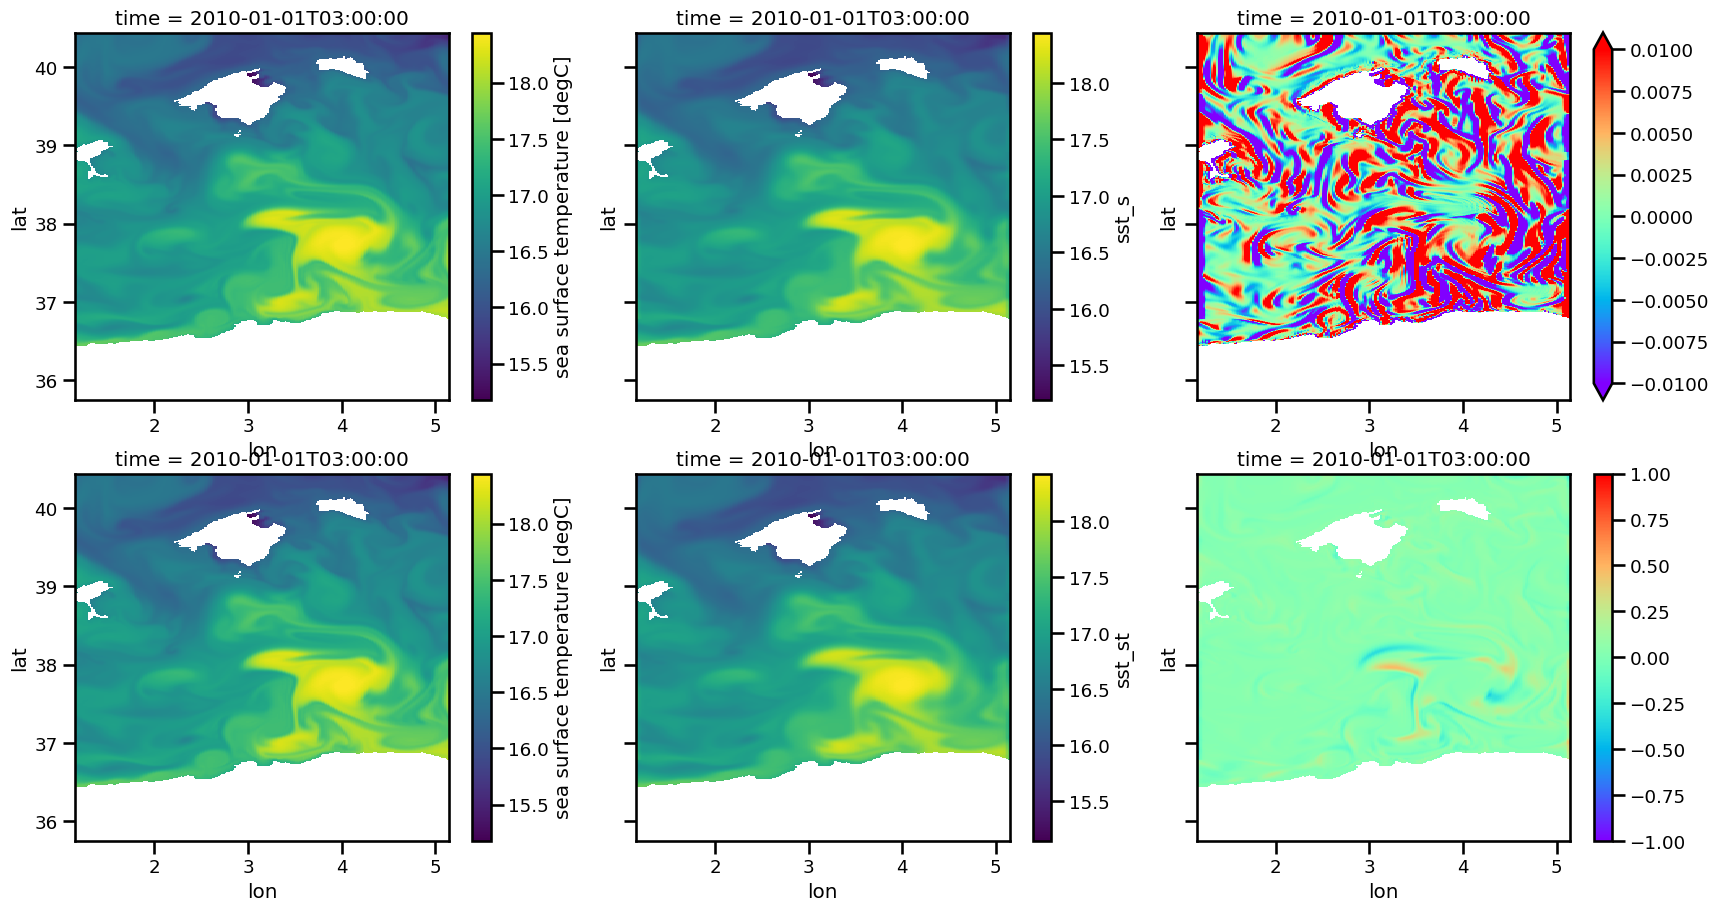

In [234]:
from mpsd import *
from myfuncts2  import *

dsmask = xr.open_mfdataset('/home/anas/MEOM_Workspace/data/raw/masks.nc')

filter25km =create_filter(10000)
pathlist = Path('/home/anas/MEOM_Workspace/data/raw/Geo_curr/').glob('*gridT-2D.nc')                                                                                                                                                                                
upathlist =sorted(pathlist)                           
ds = xr.open_mfdataset(upathlist[0:40])
#ds['nav_lat'][:,1].values
#ds['nav_lon'][100,:].values
dsmask['nav_lat'][:,1].values
dsmask['nav_lon'][1,:].values
ds=ds.drop(['time_centered'])
ds=ds.drop(['nav_lat', 'nav_lon'])

vari="sosstsst"
#vari="sossheig"
varis="sst_s"
variss="sst_st"
ds=ds.where(ds[vari] != 0)
minlat=dsmask['nav_lat'].min().values
maxlat=dsmask['nav_lat'].max().values
minlon=dsmask['nav_lon'].min().values
maxlon=dsmask['nav_lon'].max().values
nlat = np.arange(minlat,maxlat,(maxlat-minlat)/dsmask['nav_lat'].shape[0])                                                                                                                                                                                                                                             
nlon = np.arange(minlon,maxlon,(maxlon-minlon)/dsmask['nav_lon'].shape[1])                                                                                                                                                                                                                                             

ds=ds.assign(sst_s=filter25km.apply(ds[vari], dims=['y', 'x']))
a=gaussian_filter1d(ds[varis], 1.5, axis=0)
ds=ds.assign(sst_st=filter25km.apply(ds[vari], dims=['y', 'x']))
ds[variss].values=a
#ds=ds.where(ds[variss] != 0)

ds['x']=nlon
ds['y']=nlat
ds=ds.rename({'x': 'lon','y': 'lat', 'time_counter': 'time'})

plt.rcParams["figure.figsize"] = [20.50, 10.50]
f, ax = plt.subplots(2, 3, sharey=True)


ds[vari][0,:,:].plot(ax=ax[0,0],x='lon', y='lat')
ds[varis][0,:,:].plot(ax=ax[0,1],x='lon', y='lat')
difff=ds[vari]-ds[varis]
difff[0,:,:].plot(ax=ax[0,2],x='lon', y='lat',cmap=cm.rainbow, vmin=-0.01,vmax=0.01)
ds[vari][0,:,:].plot(ax=ax[1,0],x='lon', y='lat')
ds[variss][0,:,:].plot(ax=ax[1,1],x='lon', y='lat')
difff=ds[vari]-ds[variss]
difff[0,:,:].plot(ax=ax[1,2],x='lon', y='lat',cmap=cm.rainbow, vmin=-1,vmax=1)

plt.show()


### plot gcm filter 

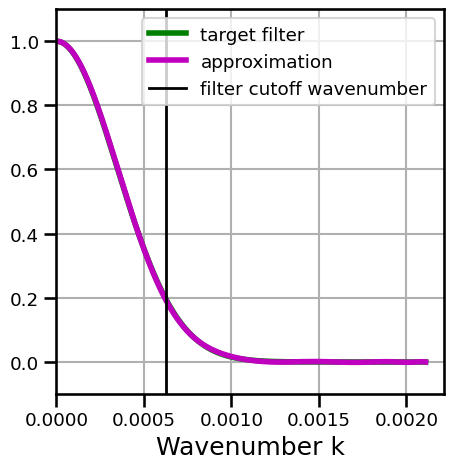

In [136]:
plt.rcParams["figure.figsize"] = [5,5]
filter25km.plot_shape()
plt.show()

### plot time evolution of a given lat/lon over time before after time smoothing

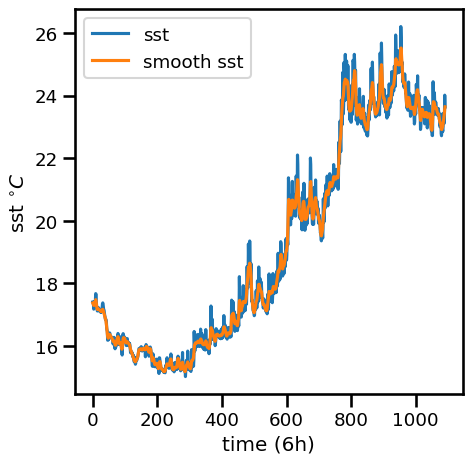

In [173]:
plt.rcParams["figure.figsize"] = [5,5]

plt.plot(ds[vari][:,100,100])
plt.plot(ds[variss][:,100,100])
plt.legend(['sst', 'smooth sst'])
plt.xlabel('time (6h)')
plt.ylabel('sst $^{\circ}C$')
plt.show()

In [235]:
ds1=ds
rmse_t_oi1, rmse_xy_oi1, nrmse, nrmse_std = rmse_based_scores(ds, ds1, vari, variss)
psd_oi1, psds_score, psdt_score  = psd_based_scores(ds, ds1, vari, variss)


[########################################] | 100% Completed |  1.7s
[########################################] | 100% Completed |  1.1s


In [236]:
import xarray as xr
import numpy
import hvplot.xarray
import pyinterp
import dask
import warnings
import xrft
import os
import sys
import pandas as pd
import logging
warnings.filterwarnings('ignore')
data = [['4DVarNet GF/GF', 
         nrmse, 
         nrmse_std, 
         psds_score, 
         psdt_score,
        'gcm_10km, 1.5_in time']]

Leaderboard = pd.DataFrame(data, 
                           columns=['Method', 
                                    "µ(RMSE) ", 
                                    "σ(RMSE)", 
                                    'λx (degree)', 
                                    'λt (days)', 
                                    'Notes'])
print("Summary of the leaderboard metrics:")
Leaderboard


Summary of the leaderboard metrics:


,Method,µ(RMSE),σ(RMSE),λx (degree),λt (days),Notes
0,4DVarNet GF/GF,1.0,0.0,0.13,1.5,"gcm_10km, 1.5_in time"


In [237]:
plt.rcParams["figure.figsize"] = [5,5]
rmse_t_oi1.hvplot.line(x='time', y='rmse_t', ylim=(0.9, 1), cmap=['royalblue', 'lightcoral'], title='RMSE-based scores')

:Curve   [time]   (rmse_t)

np


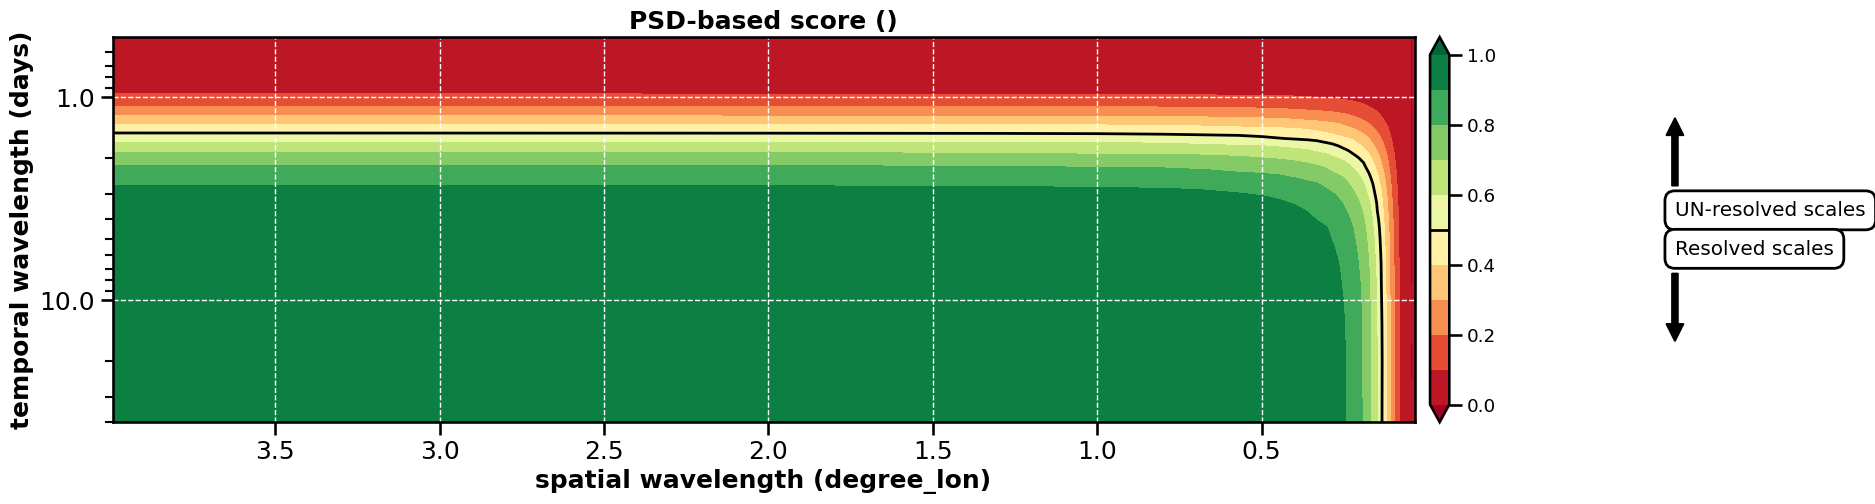

In [247]:
from myfuncts2  import *
plt.rcParams["figure.figsize"] = [5,5]

plot_psd_score(psd_oi1)